In [53]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pathlib
DATA_FOLDER = pathlib.Path("/home/jovyan/work/Dan/data")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})

import pandas as pd
import numpy as np

The data is pretty accurate, but there are some damaged columns with NaN data, or there are empty at all. <br>
About our experiments, there was not big problems, because the data we chose was pretty accurate, except for one column. <br>
Here are the chosen classifier columns:


In [54]:
PATH = pathlib.Path(DATA_FOLDER / 'pwdb/pickle/df_full.pkl')

df = pd.read_pickle(PATH)
df1 = df[['Subcategory','Category','Target groups', 'Type of measure','Private or public sector']]

d = {'columns': ['Subcategory','Category','Target groups','Sectors','Occupations','Type of measure','Private or public sector']}
df_columns = pd.DataFrame(data=d)
df_columns

,columns
0,Subcategory
1,Category
2,Target groups
3,Sectors
4,Occupations
5,Type of measure
6,Private or public sector


### Missing Values

In [55]:
df.replace('', np.nan, regex=True, inplace=True)

The main problem is NaN values. Some columns are 100% missing, or have a decent amount of missing values.




In [56]:
df_na = pd.DataFrame(df.isnull().sum(), columns=["Missing"])
df_na["Percentage"] = df_na["Missing"] / df.shape[0] * 100
df_na.sort_values(by='Missing', ascending=False)

,Missing,Percentage
Role of social partners,935,100.00 %
Form of social partner involvement,935,100.00 %
End date,379,40.53 %
Target groups,238,25.45 %
Views of social partners,148,15.83 %
Title (national language),50,5.35 %
Status of regulation,5,0.53 %
Identifier,0,0.00 %
Actors,0,0.00 %
Occupations,0,0.00 %


We managed to work with 3 classifier labels: Type of measure, Category, Target groups. <br>
The data is very unstable. There are dominant labels that contains most of data. <br>
Overweight data:

In [57]:
def data_graphic(x, y, title, xlabel, ylabel):
    """
    :param x: coordinates of the bars
    :param y: the height of the bar
    :param title: graphic's title
    :param xlabel: the label text
    :param ylabel: the label text
    """
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(x, y)
    plt.xticks(x, '')

## Type of measure
### Frequency table


In [58]:
pd.options.display.float_format = '{:,.2f} %'.format
tom_count = df['Type of measure'].value_counts()
data_tom = df['Type of measure'].unique()
vc_tom = df['Type of measure'].value_counts()
df_tom = pd.DataFrame(df, columns=['Type of measure'])
df_tom = vc_tom / df['Type of measure'].shape[0] * 100
df_tom_table = pd.DataFrame({'Frequency': df_tom})
df_tom_table = df_tom_table.reset_index()
df_tom_table


,index,Frequency
0,Legislations or other statutory regulations,70.37 %
1,Other initiatives or policies,12.94 %
2,Bipartite collective agreements,7.38 %
3,Non-binding recommendations or other texts,4.92 %
4,Company practices,2.57 %
5,Tripartite agreements,1.82 %


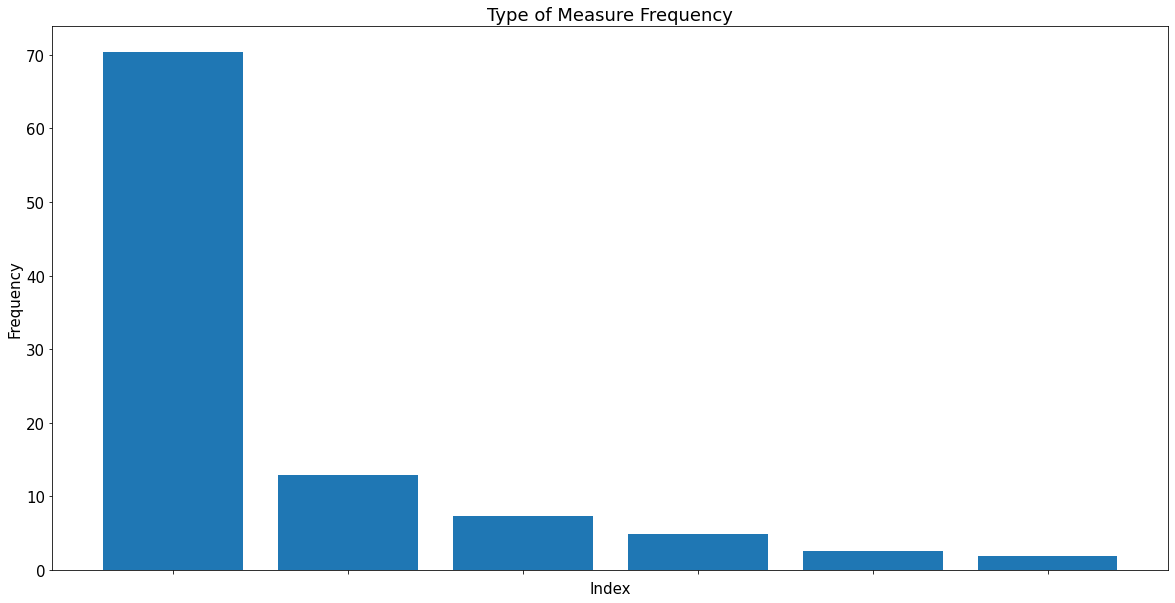

In [59]:
data_graphic(df_tom_table['index'],
             df_tom_table['Frequency'],
             'Type of Measure Frequency',
             'Index',
             'Frequency')


### Value table

In [60]:
df_tom_table_values = pd.DataFrame({'Values': tom_count})
df_tom_table_values = df_tom_table_values.reset_index()
df_tom_table_values

,index,Values
0,Legislations or other statutory regulations,658
1,Other initiatives or policies,121
2,Bipartite collective agreements,69
3,Non-binding recommendations or other texts,46
4,Company practices,24
5,Tripartite agreements,17


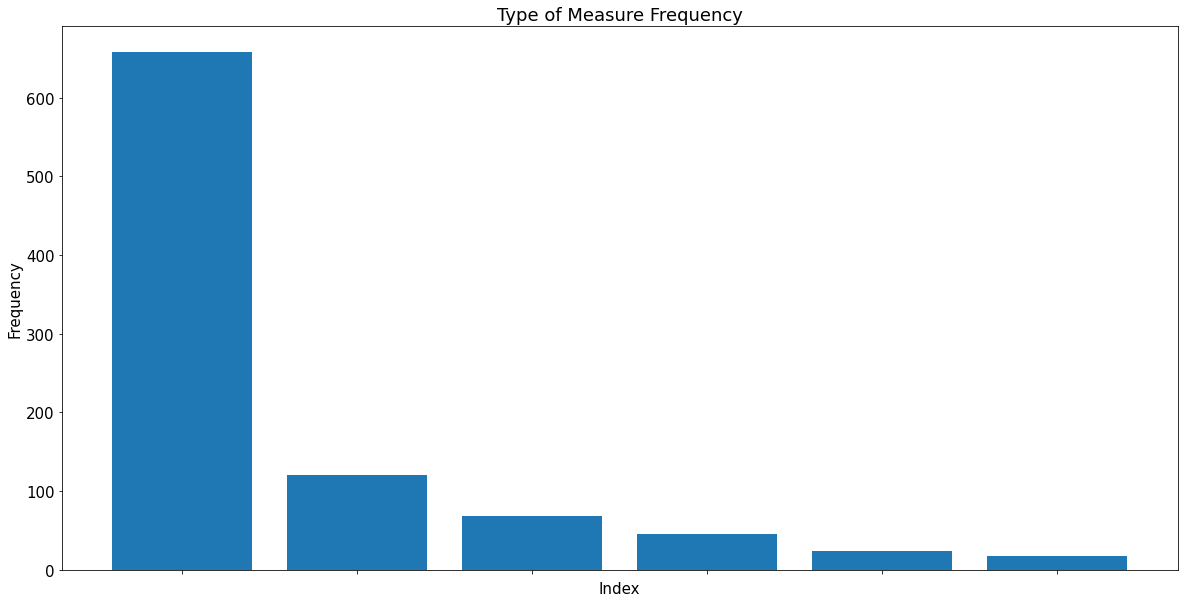

In [61]:
data_graphic(df_tom_table_values['index'],
             df_tom_table_values['Values'],
             'Type of Measure Frequency',
             'Index',
             'Frequency')

## Category
### Frequency table


In [62]:
pd.options.display.float_format = '{:,.2f} %'.format
cat_count = df['Category'].value_counts()
cat_data = df['Category'].unique()
vc_cat = df['Category'].value_counts()
df_cat = pd.DataFrame(df, columns=['Category'])
df_cat = vc_cat / df['Category'].shape[0] * 100
df_cat_table = pd.DataFrame({'Frequency': df_cat})
df_cat_table = df_cat_table.reset_index()
df_cat_table

,index,Frequency
0,Supporting businesses to stay afloat,30.16 %
1,Income protection beyond short-time work,13.80 %
2,"Protection of workers, adaptation of workplace",11.98 %
3,"Promoting the economic, labour market and soci...",11.23 %
4,Ensuring business continuity and support for e...,9.63 %
5,Employment protection and retention,9.41 %
6,Measures to prevent social hardship,7.70 %
7,Supporting businesses to get back to normal,3.53 %
8,Reorientation of business activities,2.57 %


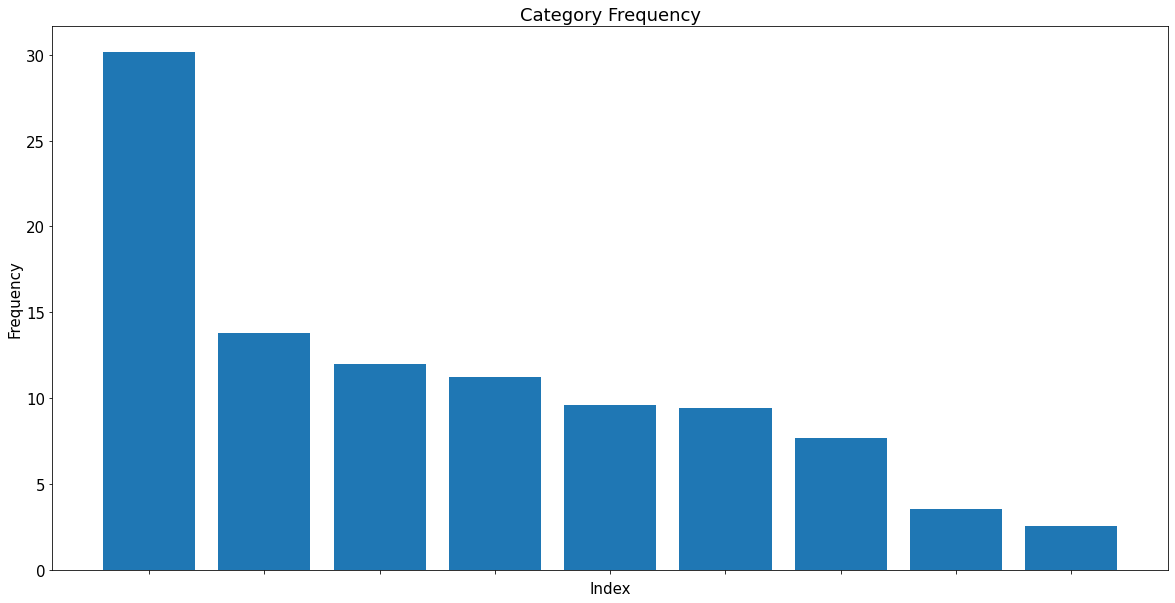

In [70]:
data_graphic(df_cat_table['index'],
             df_cat_table['Frequency'],
             'Category Frequency',
             'Index',
             'Frequency')

### Value table


In [64]:
df_cat_table_values = pd.DataFrame({'Values': cat_count})
df_cat_table_values = df_cat_table_values.reset_index()
df_cat_table_values

,index,Values
0,Supporting businesses to stay afloat,282
1,Income protection beyond short-time work,129
2,"Protection of workers, adaptation of workplace",112
3,"Promoting the economic, labour market and soci...",105
4,Ensuring business continuity and support for e...,90
5,Employment protection and retention,88
6,Measures to prevent social hardship,72
7,Supporting businesses to get back to normal,33
8,Reorientation of business activities,24


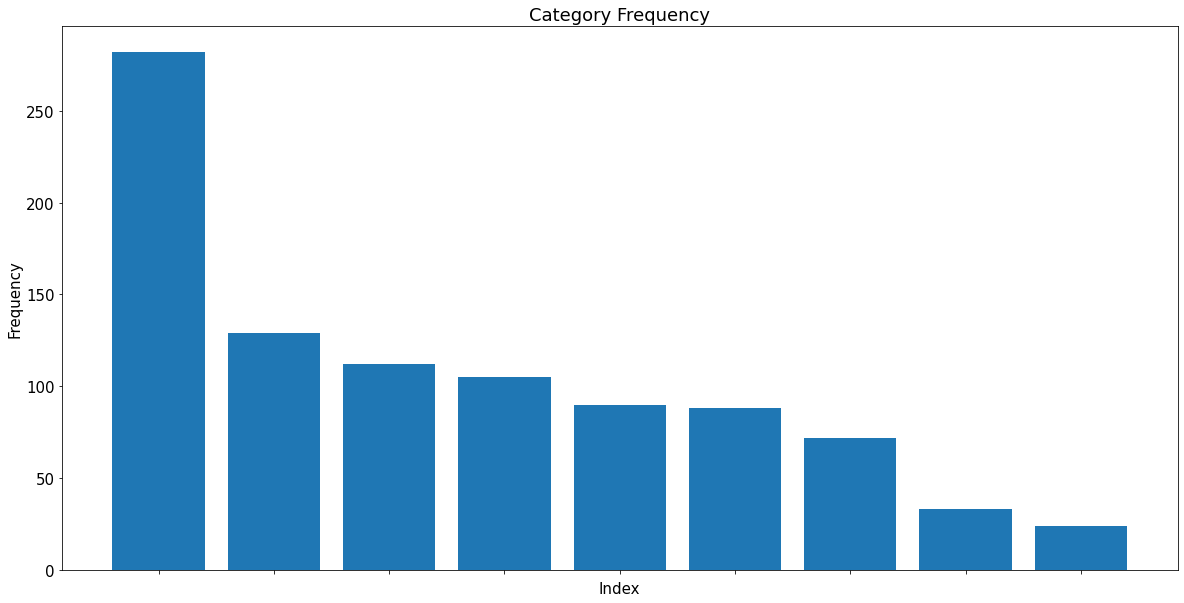

In [71]:
data_graphic(df_cat_table_values['index'],
             df_cat_table_values['Values'],
             'Category Frequency',
             'Index',
             'Frequency')

## Target groups
### Frequency table


In [66]:
pd.options.display.float_format = '{:,.2f} %'.format
tg_count = df['Target groups'].value_counts()
tg_data = df['Target groups'].unique()
vc_tg = df['Target groups'].value_counts()
df_tg = pd.DataFrame(df, columns=['Target groups'])
df_tg = vc_tg / df['Target groups'].shape[0] * 100
df_tg_table = pd.DataFrame({'Frequency': df_tg})
df_tg_table = df_tg_table.reset_index()
df_tg_table

,index,Frequency
0,Employees in standard employment,9.20 %
1,Sector specific set of companies,9.09 %
2,Self-employed,3.32 %
3,Unemployed,2.99 %
4,SMEs,2.67 %
...,...,...
197,"Disabled, Disabled workers, Other businesses, ...",0.11 %
198,Children (minors),0.11 %
199,"Employees in standard employment, Other groups...",0.11 %
200,"Sector specific set of companies, Start-ups",0.11 %


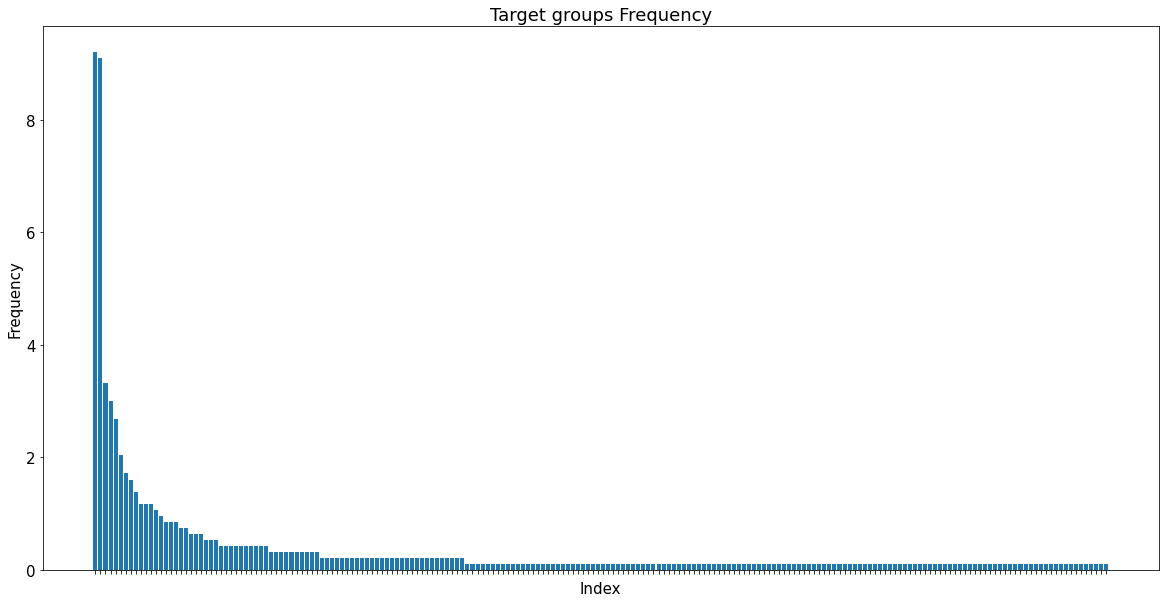

In [69]:
data_graphic(df_tg_table['index'],
             df_tg_table['Frequency'],
             'Target groups Frequency',
             'Index',
             'Frequency')

### Value table


In [78]:
df_tg_table_values = pd.DataFrame({'Values': tg_count})
df_tg_table_values = df_tg_table_values.reset_index()
df_tg_table_values

,index,Values
0,Employees in standard employment,86
1,Sector specific set of companies,85
2,Self-employed,31
3,Unemployed,28
4,SMEs,25
...,...,...
197,"Disabled, Disabled workers, Other businesses, ...",1
198,Children (minors),1
199,"Employees in standard employment, Other groups...",1
200,"Sector specific set of companies, Start-ups",1


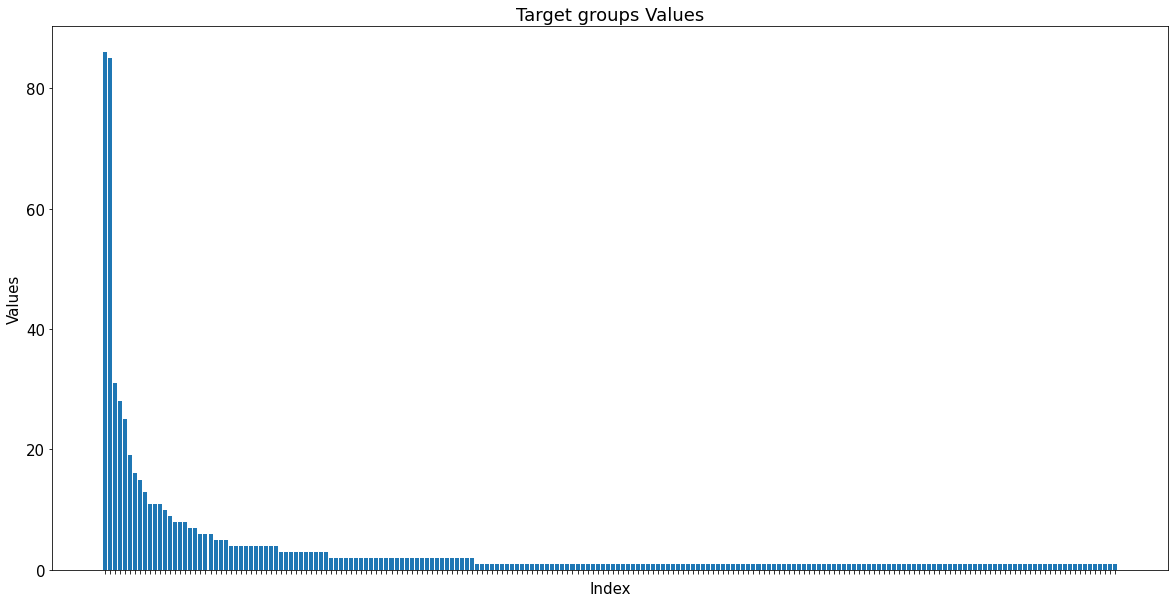

In [80]:
data_graphic(df_tg_table_values['index'],
             df_tg_table_values['Values'],
             'Target groups Values',
             'Index',
             'Values')

NaN values statistic in:


In [81]:
selected =  ['Category', 'Target groups','Type of measure']
df_na[df_na.index.isin(selected)]

,Missing,Percentage
Type of measure,0,0.00 %
Category,0,0.00 %
Target groups,238,25.45 %


to train the model we chose:
* title
* descriptionBackgroundInfo
* descriptionUseOfMeasure

We used SVM algorithm for Type of measure and Category columns, and KNeighborsClassifier for target groups. As I mentioned, because of unstable data the model is for from
perfection. Through our prediction, we can say that SVM is not the best algorithm working with given labels.
What about target group? The results are pretty good for the data we have.